<a href="https://colab.research.google.com/github/hitomitsu50/Sports_data_portfolio_MLB_Statcast/blob/main/2025%E5%B9%B4Statcast%E3%82%AB%E3%83%BC%E3%83%96%E3%81%AE%E8%90%BD%E5%B7%AE%E3%81%AB%E7%9B%B8%E9%96%A2%E3%81%99%E3%82%8B%E5%9B%9E%E8%BB%A2%E5%8A%B9%E7%8E%87%E3%81%AE%E6%A4%9C%E8%A8%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ライブラリのインストール
!pip install pybaseball japanize_matplotlib
!sudo apt-get-y update
!sudo apt-get-y install fonts-ipaexfont

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 31.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.7/432.7 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 61.1 MB/s eta 0:00:00
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=31b8901ec4c61a82e5880570833575a93e3dbbe8715e0e46a49b280b2abb0d9c
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize_matplotlib
sudo: apt-get-y: command not found
sudo: apt-get-y: command not found


In [ ]:
#ライブラリのインポート
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
import time
import glob
from pybaseball import statcast

In [ ]:
#データの読み込みと結合
#ファイル名パターンに一致するＣＳＶを取得
csv_files_pattern=("sample_data/statcast_*.csv")
csv_files=glob.glob(csv_files_pattern)

In [ ]:
#各ＣＳＶファイルを読み込み リストに格納
dfs=[]
for file in csv_files:
  try:
    df_month=pd.read_csv(file)
    dfs.append(df_month)
    print(f"{file}を読み込みました。")
  except Exception as e:
    print(f"{file}の読み込み中にエラーが発生: {e}")

sample_data/statcast_2025-03-18-2025-03-31.csvを読み込みました。
sample_data/statcast_2025-07-01-2025-07-31.csvを読み込みました。
sample_data/statcast_2025-08-01-2025-08-31.csvを読み込みました。
sample_data/statcast_2025-04-01-2025-04-30.csvを読み込みました。
sample_data/statcast_2025-05-01-2025-05-31.csvを読み込みました。
sample_data/statcast_2025-06-01-2025-06-30.csvを読み込みました。
sample_data/statcast_2025-09-01-2025-09-28.csvを読み込みました。


In [ ]:
#全てのデータフレームを結合
if dfs:
  df_combined=pd.concat(dfs, ignore_index=True)
  df=df_combined #結合したファイルをdfに格納
  print("全てのデータフレームを結合しました。")
  display(df.head())
  print(f"結合後の行数 {len(df)}")
else:
  print("読み込めるCSVファイルが見つかりませんでした。")


全てのデータフレームを結合しました。


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,SI,2025-03-31,96.6,0.22,7.01,"Bautista, Félix",608324,642585,field_out,hit_into_play,...,2.0,0.86,0.33,0.33,69.1,NaN,NaN,NaN,NaN,NaN
1,SL,2025-03-31,86.8,-0.50,6.78,"Bautista, Félix",608324,642585,NaN,ball,...,2.0,3.02,-0.52,-0.52,57.4,NaN,NaN,NaN,NaN,NaN
2,SI,2025-03-31,97.8,0.18,7.03,"Bautista, Félix",646240,642585,walk,ball,...,2.0,0.77,0.38,-0.38,68.6,NaN,NaN,NaN,NaN,NaN
3,SI,2025-03-31,97.8,0.18,6.95,"Bautista, Félix",646240,642585,NaN,foul,...,2.0,0.71,0.38,-0.38,73.1,2.326145,17.900737,28.548852,43.512056,18.085586
4,SI,2025-03-31,97.7,0.05,7.02,"Bautista, Félix",646240,642585,NaN,called_strike,...,2.0,0.59,0.39,-0.39,71.4,NaN,NaN,NaN,NaN,NaN


結合後の行数 742080


In [ ]:
#=====================================
#1. 相関分析用のデータ準備
#=====================================
#カーブ(CU)のみ抽出し、回転数データが有効なものをフィルタリング
curve_data=df[df["pitch_type"]=="CU"].dropna(subset=["release_spin_rate", "pfx_z","release_speed"])

#投球数１００球以上の投手に限定
pitcher_counts=curve_data["player_name"].value_counts()
qualified_pitchers=pitcher_counts[pitcher_counts >= 100].index
analysis_df=curve_data[curve_data["player_name"].isin(qualified_pitchers)]

#投手ごとの平均値を算出
correlation_data=analysis_df.groupby("player_name").agg({
    "release_spin_rate":"mean",
    "pfx_z":"mean",
    "release_speed":"mean"
}).reset_index()


In [ ]:
#=======================================
#2. 相関係数と新指標の計算
#=======================================
#回転数と落差の相関
corr_spin_pfx=correlation_data["release_spin_rate"].corr(correlation_data["pfx_z"])

#効率スコア(Efficiency Score)の算出:1000回転あたりの垂直変化量
correlation_data["Efficiency_Score"]= (correlation_data["pfx_z"].abs()/
                                       correlation_data["release_spin_rate"])*1000

#効率スコアと落差の相関
corr_eff_pfx=correlation_data["Efficiency_Score"].corr(correlation_data["pfx_z"])

print(f"Spin vs pfx_z Corr: {corr_spin_pfx:.3f}")
print(f"Efficiency vs pfx_z Corr: {corr_eff_pfx:.3f}")

Spin vs pfx_z Corr: -0.190
Efficiency vs pfx_z Corr: -0.961


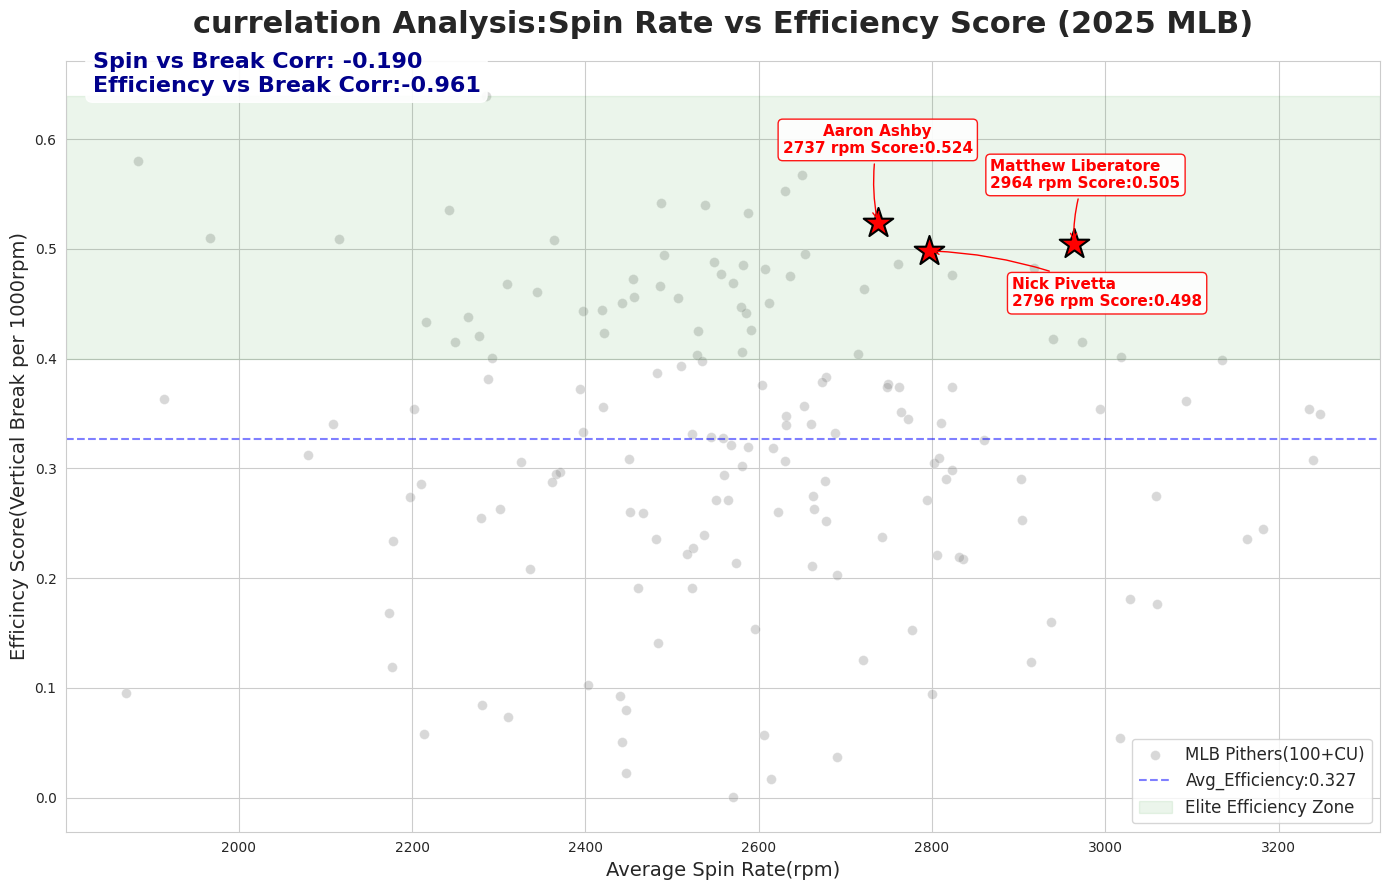

In [ ]:
#========================================
#3. 可視化
#========================================
plt.figure(figsize=(14,9))
sns.set_style("whitegrid")

#背景：全投手の散布図(薄いグレーで密度を表現)
sns.scatterplot(data=correlation_data, x="release_spin_rate", y="Efficiency_Score",
                alpha=0.3,color="gray",s=50,label="MLB Pithers(100+CU)")

#リーグ平均の効率スコアにガイド線を引く
avg_eff=correlation_data["Efficiency_Score"].mean()
plt.axhline(avg_eff, color="blue", linestyle="--",alpha=0.5,label=f"Avg_Efficiency:{avg_eff:.3f}")

#エリートゾーン（高確率エリア）を強調
plt.axhspan(0.4,correlation_data["Efficiency_Score"].max(),color="green",alpha=0.08,label="Elite Efficiency Zone")

#注目投手をプロット
notable_keywords=["Pivetta", "Ashby","Liberatore"]

for keyword in notable_keywords:
  p_data=correlation_data[correlation_data["player_name"].str.contains(keyword,case=False,na=False)]

  if not p_data.empty:
    x=p_data["release_spin_rate"].values[0]
    y=p_data["Efficiency_Score"].values[0]
    raw_name=p_data["player_name"].values[0]#正確な名前を取得

    #姓名入れえ
    if "," in raw_name:
      last,first=raw_name.split(", ")
      display_name=f"{first} {last}"
    else:
      display_name=raw_name

    #３名を赤い星で強調
    plt.scatter(x,y,color="red",s=500,marker="*",edgecolors="black",linewidth=1.5,zorder=10)

    #重ならない工夫
    if "Ashby" in display_name:
      xy_pos=(0,50)
      ha_pos="center"
    elif "Pivetta" in display_name:
      xy_pos=(60,-40)
      ha_pos="left"
    else:
      xy_pos=(-60,40)
      ha_pos="left"
    #ラベルの描画：内容、位置、矢印の設定一括で行う
    plt.annotate(f"{display_name}\n{x:.0f} rpm Score:{y:.3f}", (x,y),
                 textcoords="offset points",xytext=xy_pos,ha=ha_pos,
                 fontsize=11,fontweight="bold",color="red",
                 bbox=dict(boxstyle="round,pad=0.3",fc="white",ec="red",alpha=0.9),
                 arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=0.1",color="red"),zorder=11)
  else:
    print(f"Warning:{keyword} not found in the dataset")
#グラフの装飾(英語表記で豆腐現象を防止)
plt.title("currelation Analysis:Spin Rate vs Efficiency Score (2025 MLB)",fontsize=22,fontweight="bold",pad=20)
plt.xlabel("Average Spin Rate(rpm)",fontsize=14)
plt.ylabel("Efficincy Score(Vertical Break per 1000rpm)",fontsize=14 )

#左上に相関関数を大きく表示
stats_text=f"Spin vs Break Corr: {corr_spin_pfx:.3f}\nEfficiency vs Break Corr:{corr_eff_pfx:.3f}"
plt.text(0.02,0.96,stats_text,transform=plt.gca().transAxes,fontsize=16,
         fontweight="bold",color="darkblue",bbox=dict(boxstyle="round",facecolor="white",alpha=0.9))

plt.legend(loc="lower right",fontsize=12)
plt.tight_layout()
plt.show()